In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from scipy import integrate
from anti_derivative import PI_DeepONet
import os

cpu


In [2]:
DATA_DIR = 'data'
PLOTS_DIR = 'plots'

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

In [3]:
data = np.load(
        os.path.join(DATA_DIR, "antiderivative_aligned_train.npz"), allow_pickle=True
    )
X_temp = data["X"]
y_temp = data["y"]

x = X_temp[1]

# The U matrix
U = X_temp[0]

# The S matrix
S = y_temp

print(U.shape, S.shape, x.shape)

(150, 100) (150, 100) (100, 1)


In [4]:
branch_layers = [100, 50, 50, 50, 50, 50]
trunk_layers = [1, 50, 50, 50, 50, 50]

model = PI_DeepONet(branch_layers, trunk_layers, U, x, S)

In [5]:
model.train(1000)

RuntimeError: einsum(): subscript i has size 100 for operand 1 which does not broadcast with previously seen size 150

# tests

In [6]:
d = np.load("antiderivative_aligned_train.npz", allow_pickle=True)
X = d["X"]
y = d["y"]


KeyboardInterrupt



In [ ]:
x = X[1].reshape(len(X[1]))
x.shape

(100,)

In [ ]:
U = X[0].T
m, n = U.shape
U.shape

(100, 150)

In [ ]:
S = y.T
S.shape, m, n

((100, 150), 100, 150)

In [ ]:
x = X[1].reshape((len(X[1]), ))
x.shape

(100,)

In [ ]:
def integrate_one_function(f):
    result = np.zeros_like(f)
    result[0] = 0
    for i in range(1, len(f)):
        result[i] = integrate.simps(f[:i+1], x[:i+1])
    return result

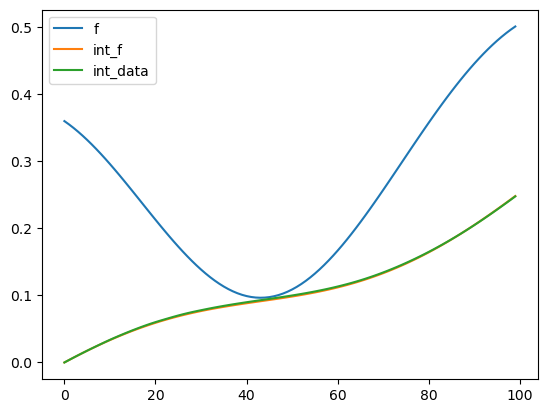

In [ ]:
idx = 66
f = X[0][idx, :]
int_f = integrate_one_function(f)
int_data = y[idx, :]

plt.plot(f, label="f")
plt.plot(int_f, label="int_f")
plt.plot(int_data, label="int_data")
plt.legend()
plt.show()

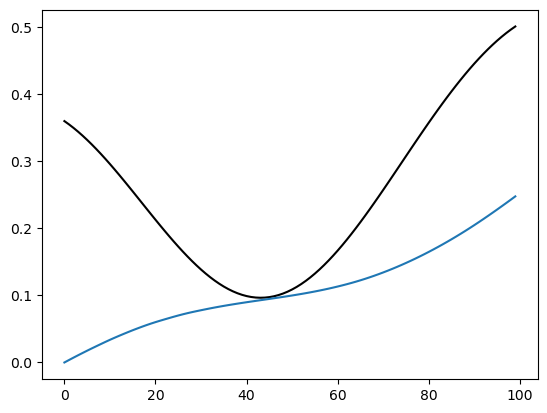

In [ ]:
idx = 66
plt.plot(X[0][idx, :], "k")
plt.plot(y[idx, :])

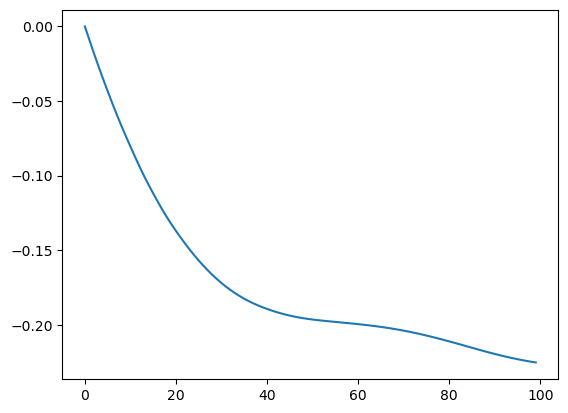

In [ ]:
plt.plot(y[15, :])

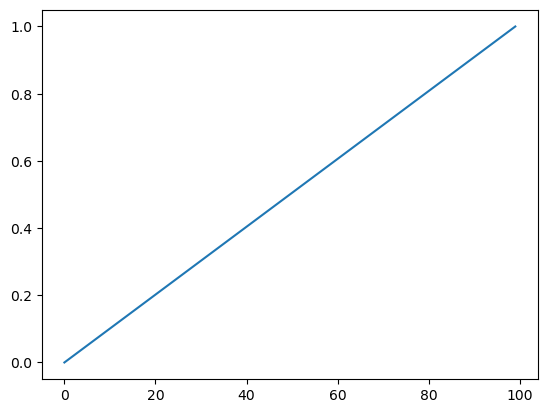

In [ ]:
plt.plot(X[1])

In [ ]:
d = np.load("antiderivative_aligned_test.npz", allow_pickle=True)
X = d["X"]
y = d["y"]

In [ ]:
X[0].shape

(1000, 100)

In [ ]:
X[1].shape

(100, 1)

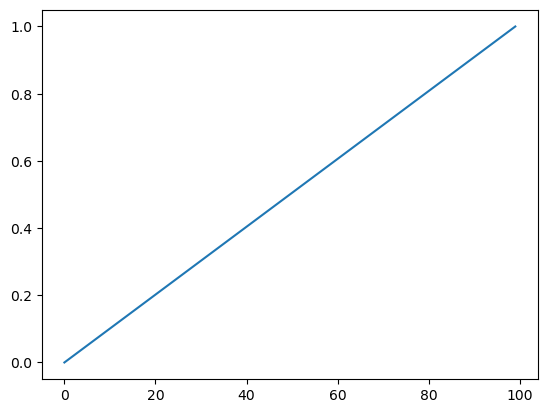

In [ ]:
plt.plot(X[1])

In [ ]:
y.shape

(1000, 100)